In [1]:
# Imports

%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as mPatches

In [2]:
# Auxiliary Function Definitions

def minoraxis(a,e):
    return a * np.sqrt(1 - e**2)

In [3]:
# Constants

T = 365.25635
omega = 2 * np.pi / T
a = 1.496e11

In [4]:
# Parameter definition

t = np.array([91., 182., 273.])

In [5]:
# Main Function to find roots for
def f(theta, t):
    return theta - omega * t - e * np.sin(theta)

def fprime(theta, t):
    return t - e * np.cos(theta)

In [6]:
# Newton-Raphson Method

def NR(guess, t, steps, epsilon):
    step_count = 0
    while abs(f(guess, t)) > epsilon and step_count <= steps:
        guess = guess - np.divide(f(guess, t), fprime(guess, t))
        step_count += 1
    return guess

In [7]:
# Main function for Calculating Orbital Position

def orbitalposition(a, e, t):
    b = minoraxis(a, e)
    E = NR(2, t, 3000, 1e-7)
    x, y = a * np.cos(E), b * np.sin(E)
    return x, y

In [8]:
 # Bringing everything together
e = 0.0167
print("t(days) \t x(m)    \t\t y(m)")
for i in t:
    position = orbitalposition(a, e, i)
    print(str(i) + " \t " + str(position[0]) + " \t " + str(position[1]))

t(days) 	 x(m)    		 y(m)
91.0 	 -1689854825.403665 	 149569594451.03656
182.0 	 -149591550215.32962 	 1589779579.5450466
273.0 	 -4927383004.895556 	 -149497980137.19043


<IPython.core.display.Javascript object>


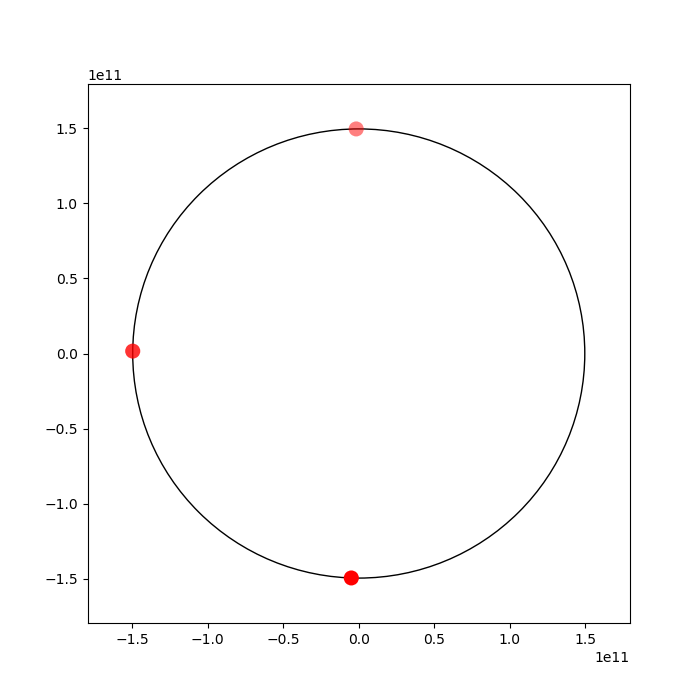

In [9]:
# Setup the figure
b = minoraxis(a, e)
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 7)
ax = plt.axes(xlim=(-1.2*a, 1.2*a), ylim=(-1.2*b, 1.2*b))

path = mPatches.Ellipse((0,0), 2*a, 2*b, angle=0, fill=False)
point1 = plt.Circle((orbitalposition(a, e, t[0])), 5e9, fc='r', alpha=0.5)
point2 = plt.Circle((orbitalposition(a, e, t[1])), 5e9, fc='r', alpha=0.8)
point3 = plt.Circle((orbitalposition(a, e, t[2])), 5e9, fc='r', alpha=1.)
ax.add_patch(path)
ax.add_patch(point1)
ax.add_patch(point2)
ax.add_patch(point3)

<IPython.core.display.Javascript object>


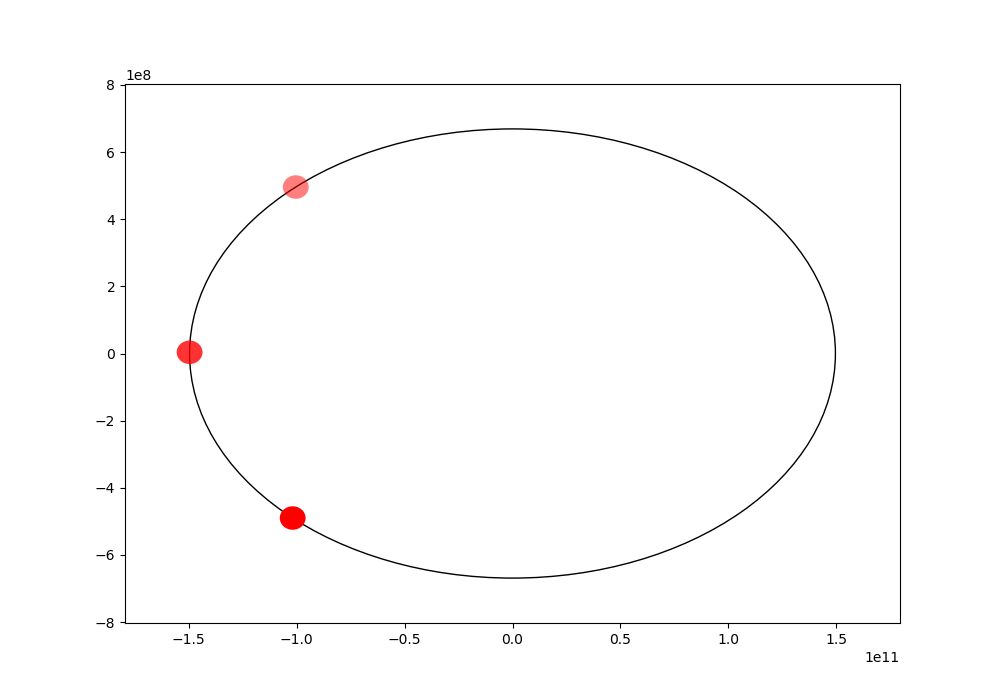

In [10]:
# EFfect of high eccentricity
e = 0.99999
b = minoraxis(a, e)
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(10, 7)
ax = plt.axes(xlim=(-1.2*a, 1.2*a), ylim=(-1.2*b, 1.2*b))

path = mPatches.Ellipse((0,0), 2*a, 2*b, angle=0, fill=False)
point1 = mPatches.Ellipse((orbitalposition(a, e, t[0])), 0.08*a, 7e7, fc='r', alpha=0.5)
point2 = mPatches.Ellipse((orbitalposition(a, e, t[1])), 0.08*a, 7e7, fc='r', alpha=0.8)
point3 = mPatches.Ellipse((orbitalposition(a, e, t[2])), 0.08*a, 7e7, fc='r', alpha=1)
ax.add_patch(path)
ax.add_patch(point1)
ax.add_patch(point2)
ax.add_patch(point3)